# Exploring Relationships

## The Lists of Content
    1. Importing Libraries and Data
    2. Data Wrangling
        2.1. Renaming Columns
    3. Data Cleaning
        3.1. Finding and Addressing Missing Values
        3.2. Finding and Addressing Duplicates
        3.3. FInding and Addressing Mix-Type Data
    4. Exploring Relationships
        4.1. Correlations
            4.1.1. Creating Correlation Heatmap using Matplotlib
            4.1.2. Creating Correlation Heatmanp using Seaborn
        4.2. Scatter Plot
        4.3. Pair Plot
        4.4. Categorical Plot
    5. Hypotheses

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path

path = r'C:\Users\praha\OneDrive\Documents\Python\04-2023 World University Rankings'

In [3]:
# Import data

df = pd.read_csv(os.path.join(path, '02. Data', 'Original Data', 'world-university-rankings.csv'))

In [4]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


## 2. Data Wrangling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [6]:
df.shape

(2200, 14)

In [7]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


### 2.1. Renaming Columns

In [8]:
# Rename columns

df.rename(columns = {'quality_of_education' : 'education_quality_rank', 'alumni_employment': 'alumni_employment_rank',
                     'quality_of_faculty': 'Faculty_quality_rank', 'publications': 'publications_rank', 
                     'influence': 'influence_rank', 'broad_impact': 'broad_impact_rank', 'patents': 'patents_rank'},
                      inplace = True)

In [9]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'education_quality_rank', 'alumni_employment_rank',
       'Faculty_quality_rank', 'publications_rank', 'influence_rank',
       'citations', 'broad_impact_rank', 'patents_rank', 'score', 'year'],
      dtype='object')

## 3. Data Cleaning

### 3.1. Finding & Addressing Missing Values

In [10]:
# Find missing values

df.isnull().sum()

world_rank                  0
institution                 0
country                     0
national_rank               0
education_quality_rank      0
alumni_employment_rank      0
Faculty_quality_rank        0
publications_rank           0
influence_rank              0
citations                   0
broad_impact_rank         200
patents_rank                0
score                       0
year                        0
dtype: int64

In [11]:
#Address missing values
median_value = df['broad_impact_rank'].median()
df['broad_impact_rank'].fillna(median_value, inplace=True)

In [12]:
# Check for missing valuesb

df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
education_quality_rank    0
alumni_employment_rank    0
Faculty_quality_rank      0
publications_rank         0
influence_rank            0
citations                 0
broad_impact_rank         0
patents_rank              0
score                     0
year                      0
dtype: int64

### 3.2. Finding and Addressing Duplicates

In [13]:
# Find duplicates

df_dups = df[df.duplicated()] 

In [14]:
df_dups.shape #no duplicates

(0, 14)

### 3.3. Finding and Addressing Mix-Type Data

In [15]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col) #there is no mix type data

## 4. Exploring Relationships

### 4.1. Correlations

#### 4.1.1. Creating a correlation heatmap using Matplotlib

In [16]:
# Create a correlation matrix using pandas

df.corr()

,world_rank,national_rank,education_quality_rank,alumni_employment_rank,Faculty_quality_rank,publications_rank,influence_rank,citations,broad_impact_rank,patents_rank,score,year
world_rank,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.853395,0.698214,-0.549098,0.320844
national_rank,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.170518,0.159440,-0.199756,0.102951
education_quality_rank,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.436278,0.528120,-0.600541,0.427732
alumni_employment_rank,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.372017,0.528219,-0.510374,0.427710
Faculty_quality_rank,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.428960,0.555107,-0.693540,0.484788
publications_rank,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.831990,0.671558,-0.522111,0.318245
influence_rank,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.830433,0.611811,-0.522837,0.318298
citations,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.769512,0.598728,-0.522438,0.328771
broad_impact_rank,0.853395,0.170518,0.436278,0.372017,0.428960,0.831990,0.830433,0.769512,1.000000,0.508821,-0.430626,0.000477
patents_rank,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.508821,1.000000,-0.474810,0.368570


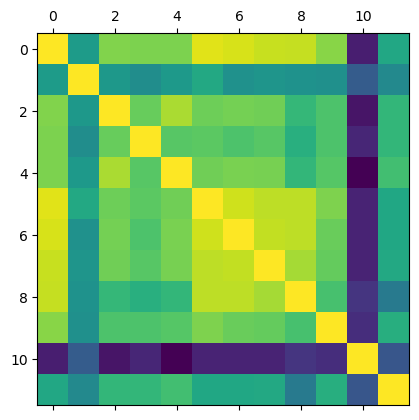

In [17]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

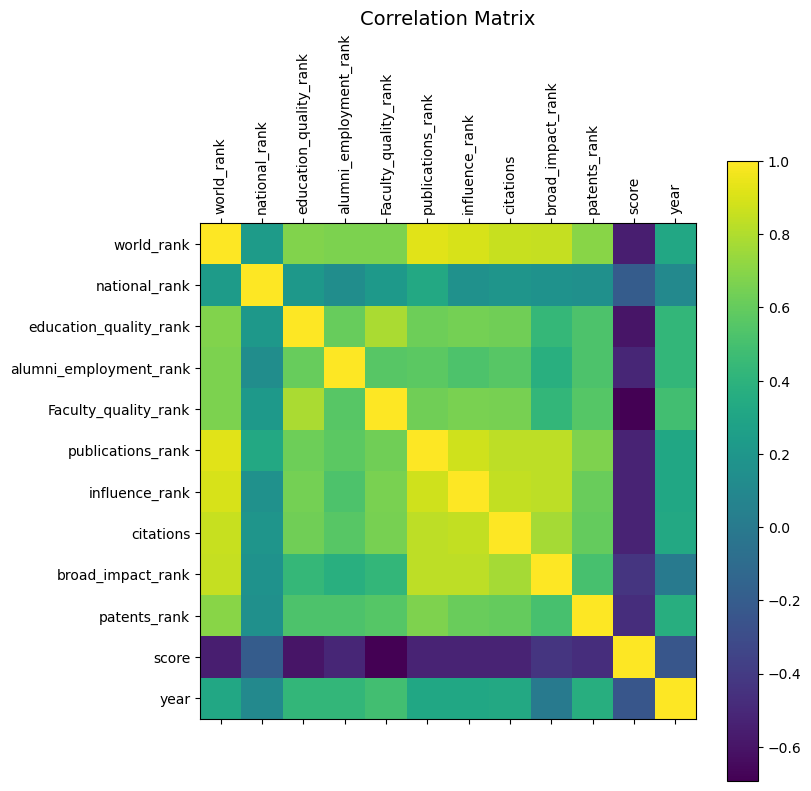

In [18]:
# Exclude 'country' and 'institution' from the correlation matrix
corr_matrix = df.drop(['country', 'institution'], axis=1).corr()

# Create the plot
f = plt.figure(figsize=(8, 8))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=10, rotation=90)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=14)

# Display the plot
plt.show()

### 4.1.2. Creating a Correlation Heatmap using Seaborn

In [19]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'education_quality_rank', 'alumni_employment_rank',
       'Faculty_quality_rank', 'publications_rank', 'influence_rank',
       'citations', 'broad_impact_rank', 'patents_rank', 'score', 'year'],
      dtype='object')

In [20]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['world_rank', 'national_rank', 'education_quality_rank', 'alumni_employment_rank', 
          'publications_rank','influence_rank', 'patents_rank', 'score', 'year']]

In [21]:
sub

,world_rank,national_rank,education_quality_rank,alumni_employment_rank,publications_rank,influence_rank,patents_rank,score,year
0,1,1,7,9,1,1,5,100.00,2012
1,2,2,9,17,12,4,1,91.67,2012
2,3,3,17,11,4,2,15,89.50,2012
3,4,1,10,24,16,16,50,86.17,2012
4,5,4,2,29,37,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...
2195,996,7,367,567,926,845,816,44.03,2015
2196,997,4,236,566,997,908,871,44.03,2015
2197,998,18,367,549,830,823,824,44.03,2015
2198,999,40,367,567,886,974,651,44.02,2015


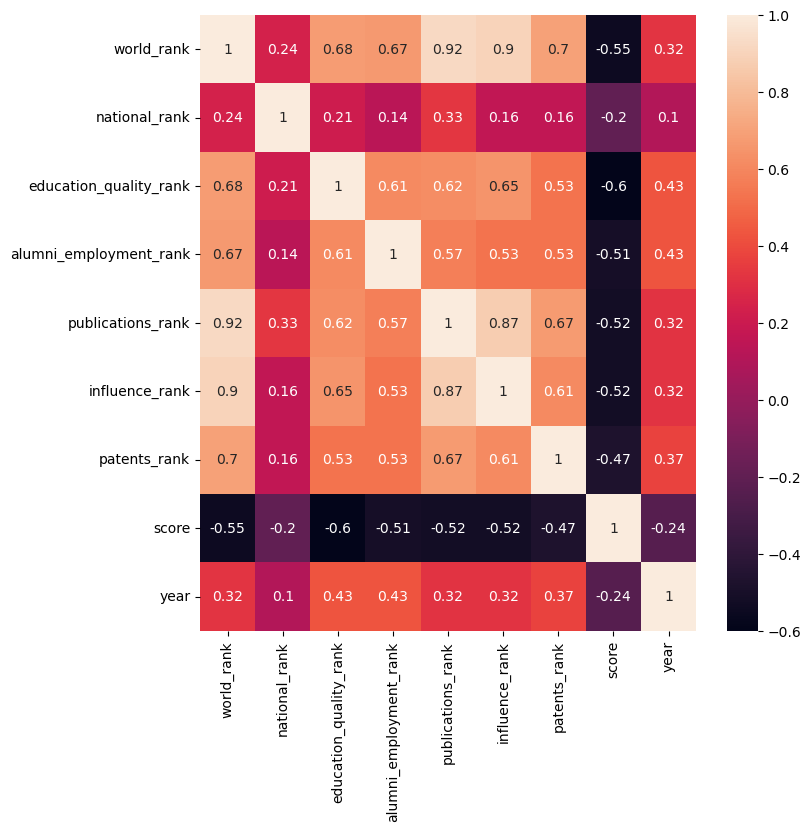

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### The coefficients represent the strength and direction of the linear relationship between pairs of variables. The coefficients can range from -1 to 1, with -1 indicating a perfect negative correlation (as one variable increases, the other decreases), 0 meaning no correlation, and 1 indicating a perfect positive correlation (as one variable increases, the other increases). For instance, as we can see, there are strong relationships between publication rank and world rank and between influence rank and world rank. It means the more decisive influence and publication in the universities, the better their position. Otherwise,  the relationships between the score and other variables are negative, which means the higher the score, the lower the rank (which is good). 

### 4.2. Scatterplot

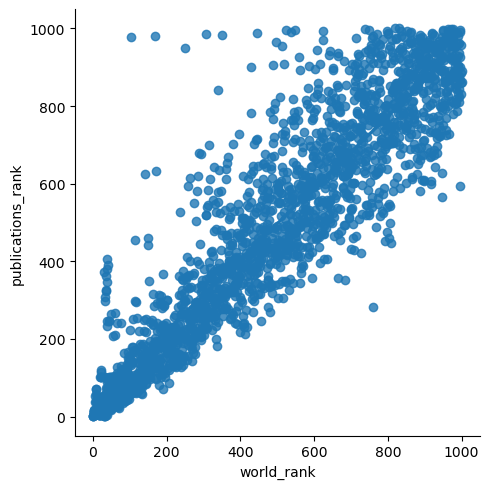

In [23]:
# Create a scatterplot for the "world rank" and "quality of education" columns in seaborn

sns.lmplot(x = 'world_rank', y = 'publications_rank', data = df)

### As we can see on the pair plot above, there is a strong relationship between world rank and publication rank, which means the publication number strongly influences the world rank. 

### 4.3. Pair Plot

In [24]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['world_rank', 'education_quality_rank', 'publications_rank', 'patents_rank', 'score', 'year']]

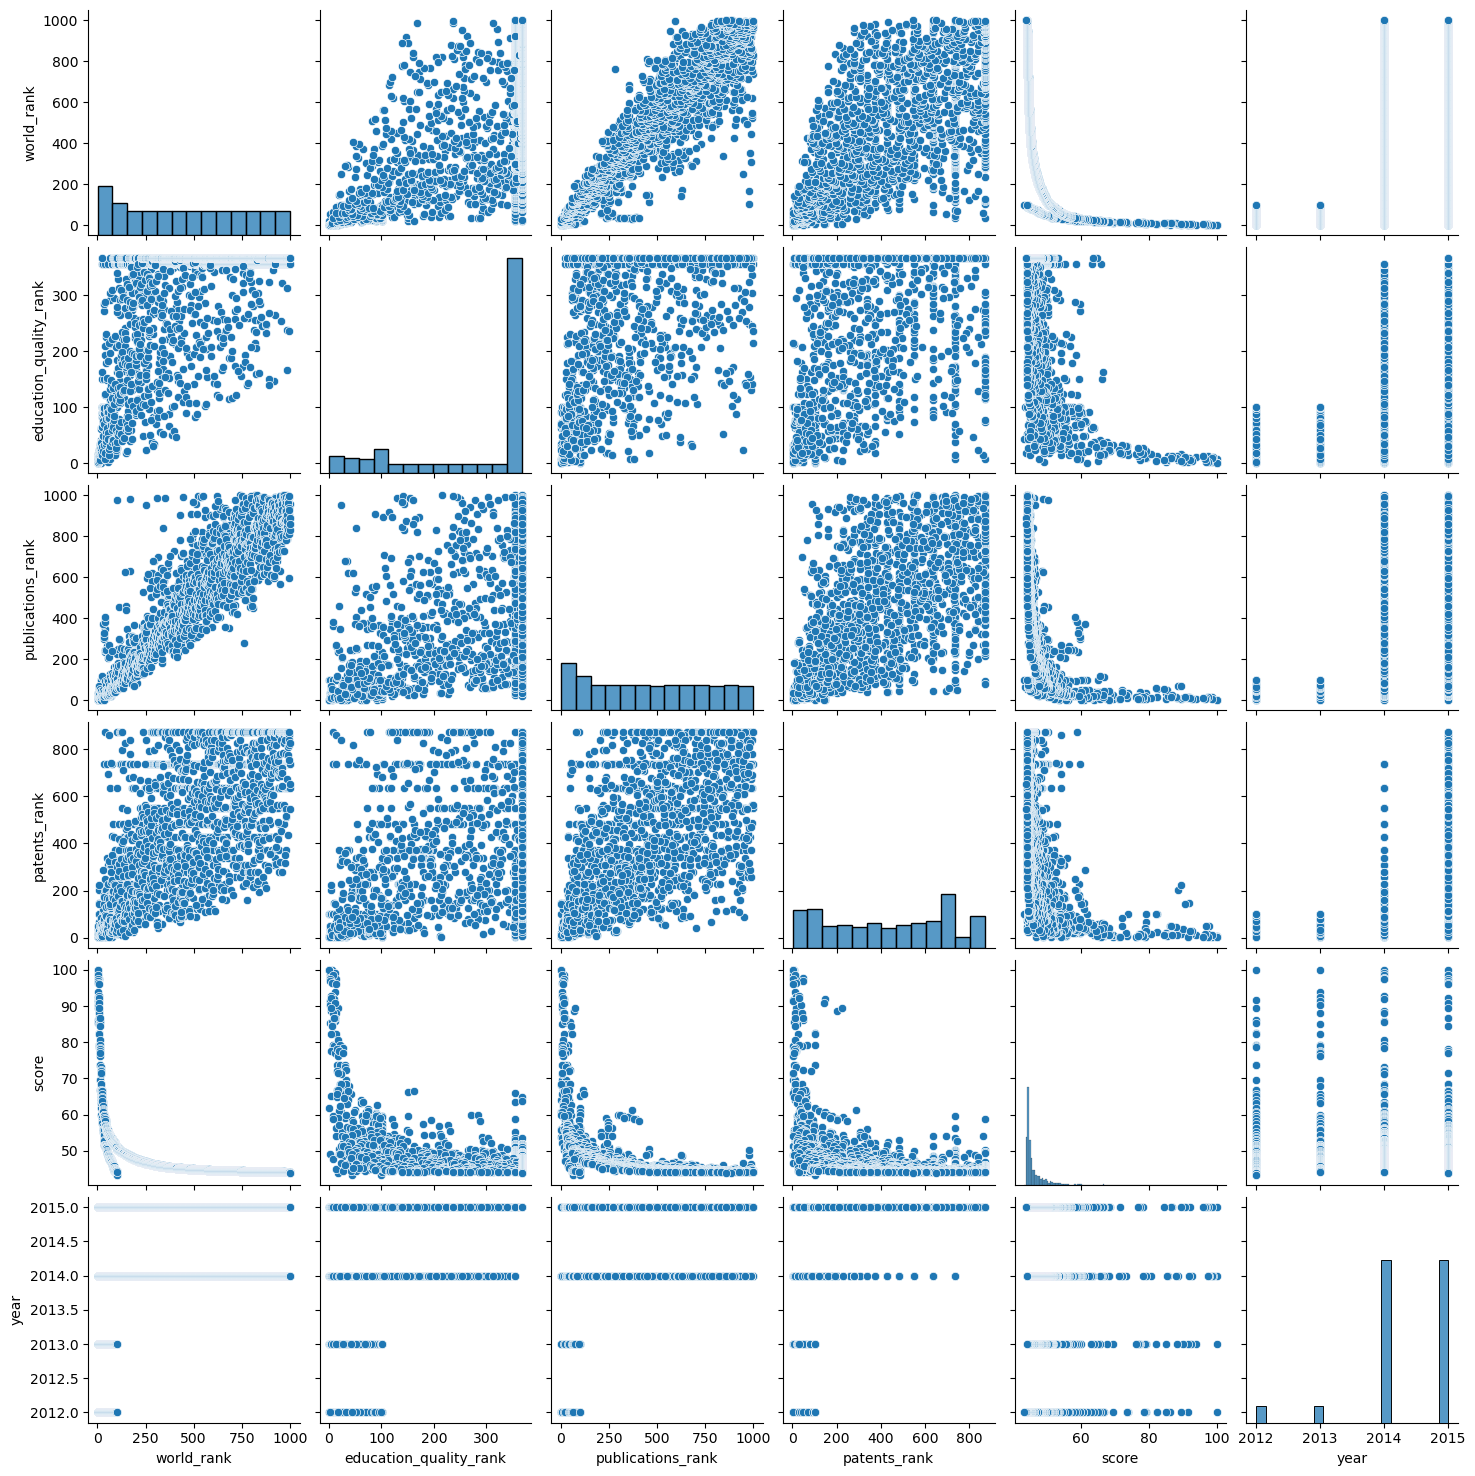

In [25]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### As we can see that almost all of the variables have positive relationships with each other except the score, which means the higher the score, the lower the rank. Furthermore, the score variable has a right-skewed histogram and will be chosen for further analysis.

### 4.4. Categorical Plot

<AxesSubplot:xlabel='score', ylabel='Count'>

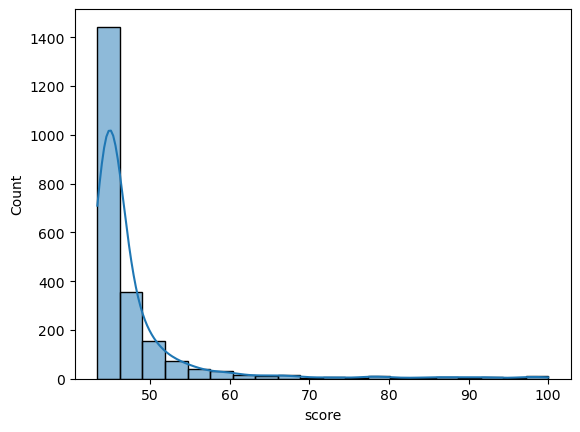

In [26]:
sns.histplot(df['score'], bins = 20, kde = True)

In [27]:
df.loc[df['score'] >=85, 'Score Level'] = 'excelent'

In [28]:
df.loc[(df['score'] >= 70) & (df['score'] < 85), 'Score Level'] = 'good'

In [29]:
df.loc[(df['score'] >= 60) & (df['score'] < 70), 'Score Level'] = 'Satisfactory'

In [30]:
df.loc[(df['score'] >= 50) & (df['score'] < 60), 'Score Level'] = 'Poor'

In [31]:
df.loc[df['score'] <50, 'Score Level'] = 'weak'

In [32]:
df['Score Level'].value_counts(dropna = False)

weak            1868
Poor             224
Satisfactory      46
excelent          35
good              27
Name: Score Level, dtype: int64

In [33]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'education_quality_rank', 'alumni_employment_rank',
       'Faculty_quality_rank', 'publications_rank', 'influence_rank',
       'citations', 'broad_impact_rank', 'patents_rank', 'score', 'year',
       'Score Level'],
      dtype='object')

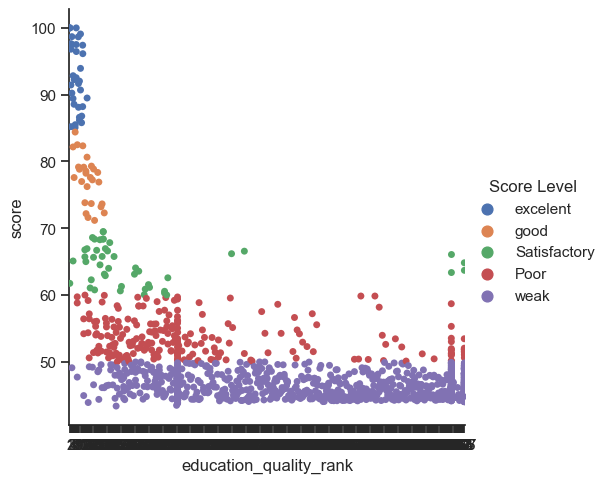

In [34]:
sns.set(style="ticks")
g = sns.catplot(x="education_quality_rank", y="score", hue="Score Level", data=df)

### The plot above suggests a relationship between a score and the quality of education, but the quality of education is not the only factor that influences the score. The categorical plot in the statement likely shows a visual representation of the relationship between different variables and the score, with the quality of education being one of those variables. The plot implies that although a moderate relationship exists between the score and the quality of education, it is not a perfect correlation, and other factors may come into play. For example, some universities with the best quality of education may still have weaker scores than other universities, indicating that other factors impact a student's score beyond just the quality of education. Therefore, while quality education is vital to a student's academic success, it is not the sole determinant, and other factors must also be considered.


## 5. Hypotheses

### H1. Higher-ranked universities tend to provide better quality education than lower-ranked universities.
### H2. Higher-ranked universities tend to have a greater number of publications than lower-ranked universities.
### H3. Universities with higher influence ranks in a particular field tend to have a greater broad impact 
### H4. Higher-ranked universities tend to have a higher rate of alumni employment than lower-ranked universities.